Hola **Alejandro**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
--
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

**Tip:** Para darle una mejor presentación a tus notebooks y que seas claro desde un inicio lo que se realizará, podrías dejar siempre al inicio del notebook en una celda tipo markdown un título general del proyecto y una breve introducción al mismo
</div>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

#temp_orders = pd.read_csv('/datasets/ltv_orders_2.csv')

visits = pd.read_csv('/datasets/visits_log_us.csv')
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

visits_new = pd.read_csv('/datasets/visits_log_us.csv')
visits_new['End Ts'] = pd.to_datetime(visits['End Ts'])
visits_new['Start Ts'] = pd.to_datetime(visits['Start Ts'])


orders = pd.read_csv('/datasets/orders_log_us.csv')
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

orders_new = pd.read_csv('/datasets/orders_log_us.csv')
orders_new['Buy Ts'] = pd.to_datetime(orders_new['Buy Ts'])

costs = pd.read_csv('/datasets/costs_us.csv')
costs['dt'] = pd.to_datetime(costs['dt'])
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el análisis inicial de tus dataset, siempre es importante primero revisar la calidad de los datos y el tipo de los mismos antes de pasar a cualquier análisis
</div>

### Cuantas personas lo usan cada día, semana y mes? ###

La cantidad de usuarios al día es de: 907
La cantidad de usuarios a la semana es de: 5825
La cantidad de usuarios al mes es de: 23228
AxesSubplot(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Unique users per month')

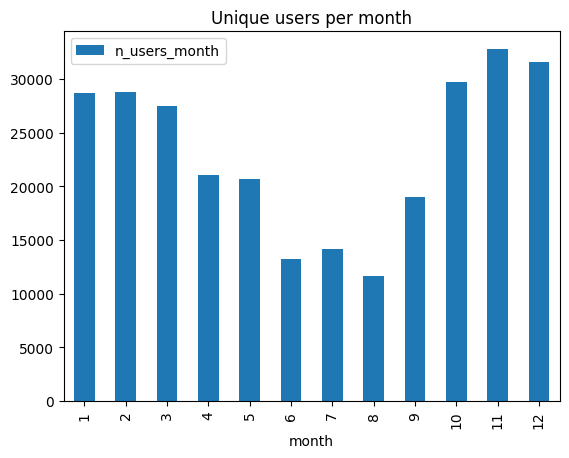

In [2]:

visits['date'] = visits['Start Ts'].dt.date
visits['week'] = visits['Start Ts'].dt.isocalendar().week
visits['month'] = visits['Start Ts'].dt.month
visits['session_duration_seconds'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds

#Se muestra la cantidad de personas que se contectan por día. No se toma en cuenta si una persona se conecta varias veces en el mismo día
users_per_day = visits.groupby('date').agg({'Uid' : 'nunique'})
users_per_day = users_per_day.rename(columns = {'Uid' : 'n_users_day'})
print('La cantidad de usuarios al día es de:', int(users_per_day.mean())) 

#Se muestra la cantidad de personas que se contectan por semana. No se toma en cuenta si una persona se conecta varias veces en la misma semana
users_per_week = visits.groupby('week').agg({'Uid' : 'nunique'})
users_per_week = users_per_week.rename(columns = {'Uid' : 'n_users_week'})
print('La cantidad de usuarios a la semana es de:', int(users_per_week.mean())) 

#print(users_per_week)

#Se muestra la cantidad de personas que se contectan por mes. No se toma en cuenta si una persona se conecta varias veces en el mismo mes
users_per_month = visits.groupby('month').agg({'Uid' : 'nunique'})
users_per_month = users_per_month.rename(columns = {'Uid' : 'n_users_month'})
print('La cantidad de usuarios al mes es de:', int(users_per_month.mean()))

print(users_per_month.plot.bar())
plt.title('Unique users per month')


#print(visits.info())

En los meses de Octubre a Diciembre es cuando mayor cantidad de personas visitan la página Showz, y de Junio a Agosto es cuando menor cantidad de personas están conectadas al sitio.

### Cuantas sesiones hay por día? ###

             Uid
date            
2017-11-24  4042
2018-05-31  2256
2017-11-25  2089
2018-02-01  1878
2018-03-26  1796
...          ...
2017-08-06   296
2017-08-12   296
2017-08-13   293
2018-03-30   134
2018-03-31     1

[364 rows x 1 columns]
Las sesiones promedio por día fue de: 987.3626373626373
AxesSubplot(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Sessions per day')

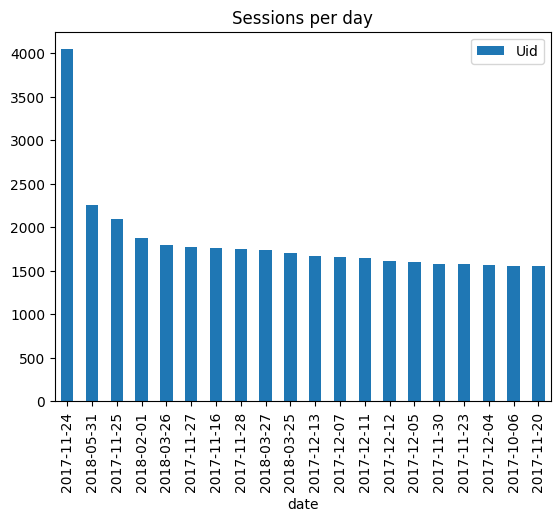

In [3]:
sessions_per_day = visits.groupby('date').agg({'Uid' : 'count'}).sort_values(by = 'Uid', ascending = False)
print(sessions_per_day)

print('Las sesiones promedio por día fue de:',sessions_per_day['Uid'].mean())

# Se hace gráfica de los 20 días con mayor cantidad de sesiones
print(sessions_per_day.head(20).plot.bar())
plt.title('Sessions per day')

En todo el año, hubo un promedio de 987 sesiones por día en la página de Showz, incluyendo sesiones de un mismo usuario que haya entrado varias veces a la página en un mismo día. El 24 de noviembre fue el día con mayor número de visitas, lo que concuerda con la tendencia de que los meses de Octubre a Diciembre es cuando más visitantes tuvo la página en todo el año.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Los cálculos se realizaron de manera correcta y lo hiciste de manera detallada y que fue explicado muy claro con las gráficas y comentarios planteados lo que deja un proceso de análisis fácil de seguir y entender, buen trabajo!
</div>

### Cuál es la duración de cada sesión? ###

La duración promedio en segundos de las visitas fue de: 643.506488592098
AxesSubplot(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Top durations per seconds')

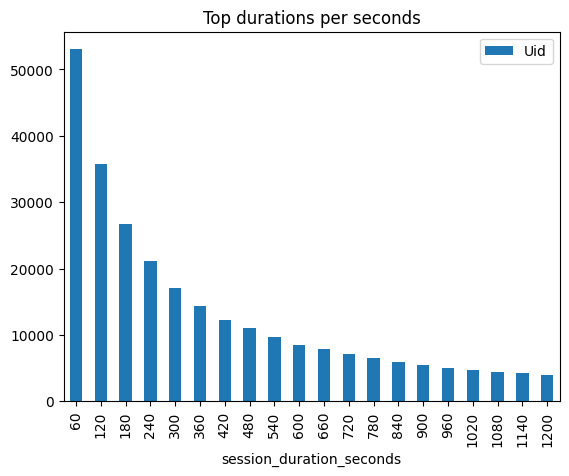

In [4]:
sorted_duration_visits = visits.sort_values(by='session_duration_seconds', ascending = False)

#Hago slice de datos para eliminar las sesiones con duración de 0 segundos.
clean_duration = visits[visits['session_duration_seconds'] != 0]
top_duration =  clean_duration.groupby('session_duration_seconds').agg({'Uid' : 'count'}).sort_values(by = 'Uid', ascending = False).head(20)

print('La duración promedio en segundos de las visitas fue de:',sorted_duration_visits['session_duration_seconds'].mean())

# Se hace una gráfica para las 20 duraciones de sesiones más recurrentes.
print(top_duration.plot.bar())
plt.title('Top durations per seconds')



El promedio de duración de las sesiones fue de 643 segundos. Sin embargo, este promedio incluía sesiones de muchísimo tiempo, lo que es algo inusual, por lo que se incluye también una gráfica de la cantidad de segundos que la mayoría de los usuarios tardan en una sesión, siendo 60 segundos el tiempo que la mayoría se quedan en la visita por sesión.

### Con qué frecuencia los usuarios regresan? ###

In [5]:


first_activity_date = visits.groupby(['Uid'])['Start Ts'].min().reset_index()
first_activity_date.name = 'first_activity_date'
first_activity_date.columns = ['Uid', 'first_activity_date']
visits = pd.merge(visits, first_activity_date, on = 'Uid') 
visits['activity_month'] = visits['Start Ts'].astype('datetime64[M]')
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
print(visits)

         Device              End Ts  Source Id            Start Ts  \
0         touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4       desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
...         ...                 ...        ...                 ...   
359395  desktop 2018-04-23 21:19:00         10 2018-04-23 21:11:00   
359396  desktop 2017-11-08 13:39:00          4 2017-11-08 13:39:00   
359397  desktop 2017-07-31 12:31:00          3 2017-07-31 12:13:00   
359398  desktop 2018-03-20 15:25:00          4 2018-03-20 15:11:00   
359399    touch 2018-04-03 11:23:00          5 2018-04-03 11:19:00   

                         Uid        date  week  month  \
0       16879256277535980062  2017-12-20    51     12   
1         104060357244891740  2018-02-19     

In [6]:
visits['cohort_lifetime'] = (visits['activity_month'] - visits['first_activity_month']) / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype(int)
print(visits.sample(10))



         Device              End Ts  Source Id            Start Ts  \
210529  desktop 2018-02-23 22:42:00          3 2018-02-23 22:42:00   
286234  desktop 2018-02-07 13:36:00          5 2018-02-07 13:29:00   
34168   desktop 2017-09-10 16:16:00          4 2017-09-10 16:14:00   
241521  desktop 2017-12-06 18:00:00          5 2017-12-06 17:57:00   
287069  desktop 2017-12-12 01:27:00          9 2017-12-12 01:17:00   
151772  desktop 2018-05-17 13:39:00          5 2018-05-17 13:37:00   
119551    touch 2017-12-13 19:12:00          2 2017-12-13 19:08:00   
316647  desktop 2017-10-26 12:33:00          2 2017-10-26 12:00:00   
214197  desktop 2018-03-28 09:47:00          4 2018-03-28 09:46:00   
130489  desktop 2017-10-25 13:05:00          5 2017-10-25 12:37:00   

                         Uid        date  week  month  \
210529   9856157032463053578  2018-02-23     8      2   
286234  11432293667263627485  2018-02-07     6      2   
34168     595831458256472501  2017-09-10    36      9   
2

El promedio de retención de los usuarios mensualmente es de: 0.0487102972673464


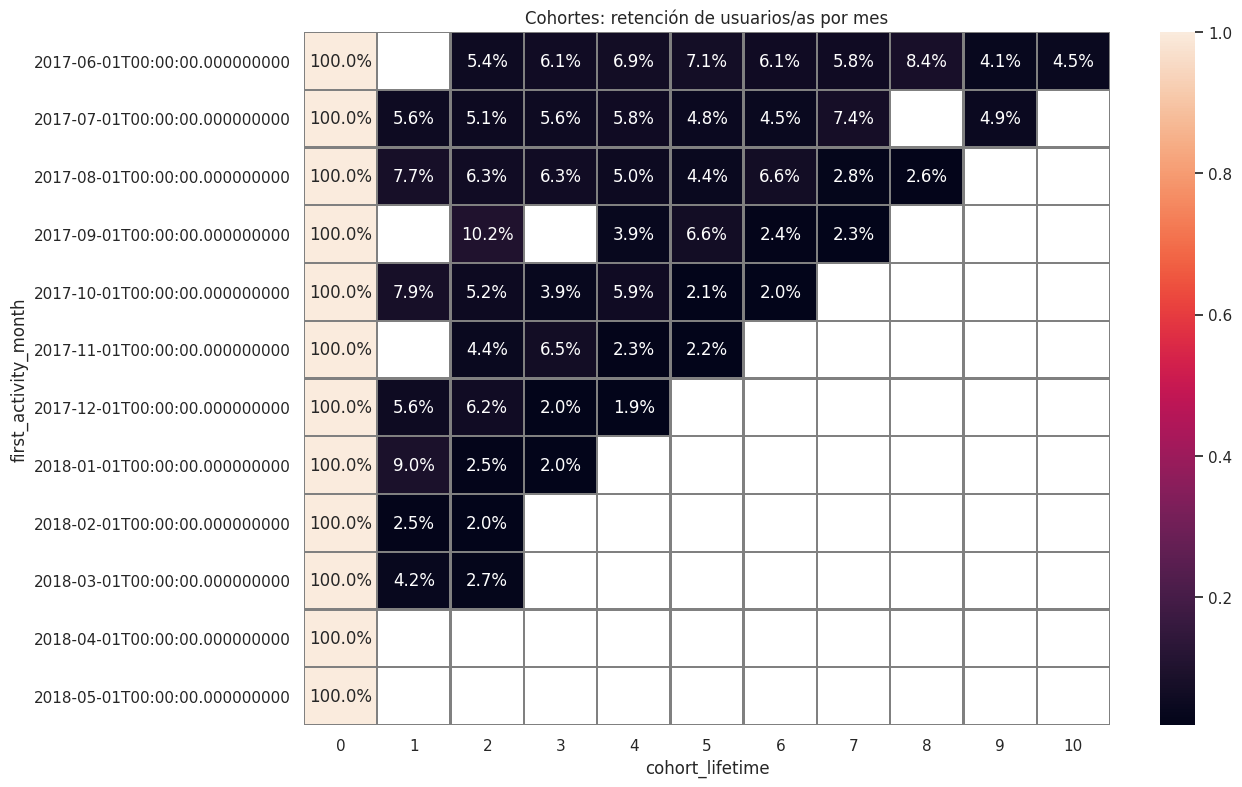

In [7]:
cohorts = visits.groupby(['first_activity_month', 'cohort_lifetime']).agg({'Uid' : 'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'Uid']]
initial_users_count = initial_users_count.rename(columns = {'Uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count, on = 'first_activity_month')
cohorts['retention'] = cohorts['Uid'] / cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index = 'first_activity_month', columns = 'cohort_lifetime', values = 'retention', aggfunc = 'sum')


sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohortes: retención de usuarios/as por mes')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'
)

#print(retention_pivot)
print('El promedio de retención de los usuarios mensualmente es de:', cohorts[cohorts['cohort_lifetime'] != 0]['retention'].mean())




La tasa de retención de los usuarios es muy baja, cercana al 5%. Lo que nos indican que muy pocas personas regresan a visitar el sitio e inclusive hay usuarios que ya no regresan al sitio ni siquiera un año después.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, cada una de las gráficas mostradas son súper claras y se entiende perfectamente lo que se quiere comunicar con las mismas. El análisis tiene un buen punto de detalle y tus comentarios destacan los puntos más importantes de cada parte
</div>

## Ventas ##
### Cuándo empieza la gente a comprar? ###

                   Uid
first_buy_lapse       
0 days           25039
1 days            1966
2 days             685
3 days             452
4 days             386
5 days             307
6 days             264
7 days             237
8 days             216
9 days             162
10 days            135
11 days            121
12 days             91
13 days            126
14 days            123
15 days            116
16 days             91
17 days             97
18 days             95
19 days             83
AxesSubplot(0.125,0.11;0.775x0.77)


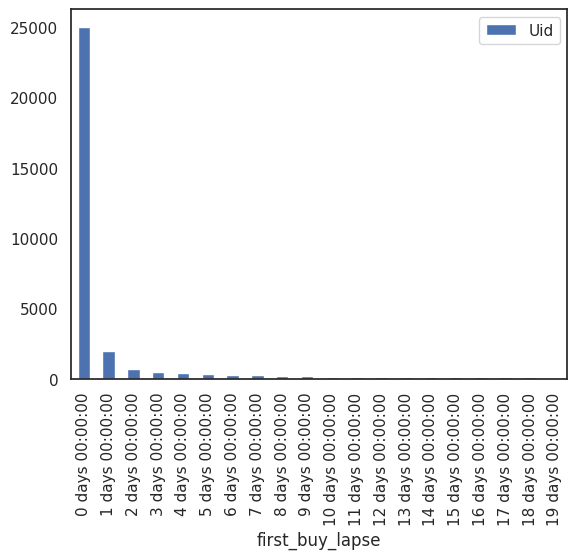

In [8]:
# Se obtiene la fecha de la primera compra en el dataframe de orders
first_buy_date = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_buy_date = first_buy_date.rename(columns = {'Buy Ts':'first_buy_date'})
first_buy_date['first_buy_date'] = first_buy_date['first_buy_date'].dt.date

#Se crea la columna de la primera compra en el dataframe de orders fusionando orders y first_buy_date y se fusiona también con el dataframe de first_activity_date
orders_ = orders.merge(first_buy_date, on = 'Uid')
orders_ = orders_.merge(first_activity_date, on = 'Uid')
orders_['first_activity_date'] = orders_['first_activity_date'].dt.date

#Se obtienen los días transcurridos desde el registro hasta la primera compra
orders_['first_buy_lapse'] = (orders_['first_buy_date'] - orders_['first_activity_date']) 

# Se agrupa el dataframe por días transcurridos y sin repetir los usuarios, ya que aqui queremos saber cuantas personas únicas hicieron pedidos
grouped_orders = orders_.groupby('first_buy_lapse').agg({'Uid' : 'nunique'}).head(20)

print(grouped_orders)
print(grouped_orders.plot.bar())



Los usuarios en su gran mayoría, realizan una compra el mismo día, lo que nos dice que casi todos los clientes son de acción rápida. En este caso, sería bueno revisar ya sea si el dispositivo con el que ingresaron a la página está optimizado para hacer las compras o si influye la temporada o estación del año.

### Cuántos pedidos hacen durante un período de tiempo dado? ###

El promedio de compras por mes es de: 4201.25
AxesSubplot(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Compras por mes')

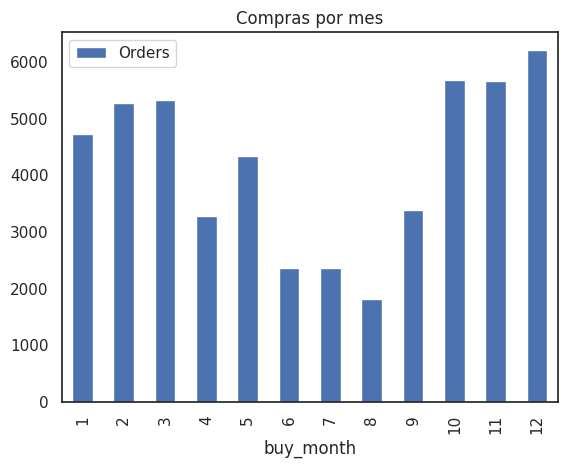

In [9]:

# Se obtiene el número del mes
orders_['buy_month'] = orders_['Buy Ts'].dt.month

# Se agrupan los pedidos de acuerdo al mes y se hacen conteos de la cantidad de productos.
orders_per_month = orders_.groupby('buy_month').agg({'Uid' : 'count'})
orders_per_month.columns = ['Orders']


print('El promedio de compras por mes es de:', orders_per_month['Orders'].mean())
print(orders_per_month.plot.bar())
plt.title('Compras por mes')

Se visualiza que en el mes de diciebre es cuando más compras se realizan. Probablemente como regalo de navidad.

### Cuál es el tamaño promedio de compra? ###

                      order_quantity
Uid                                 
3644482766749211722              239
13888745432979765063             238
11920452646463905188             227
6731421022966725351              183
3501596628378158474              150
...                              ...
6676175570039043777                1
6675771101535611319                1
6672916778504045342                1
6672721635257383882                1
18446167067214817906               1

[36523 rows x 1 columns]
El promedio de compras por usuario es de : 1.3803630588943954


Text(0.5, 1.0, 'Compras por usuario')

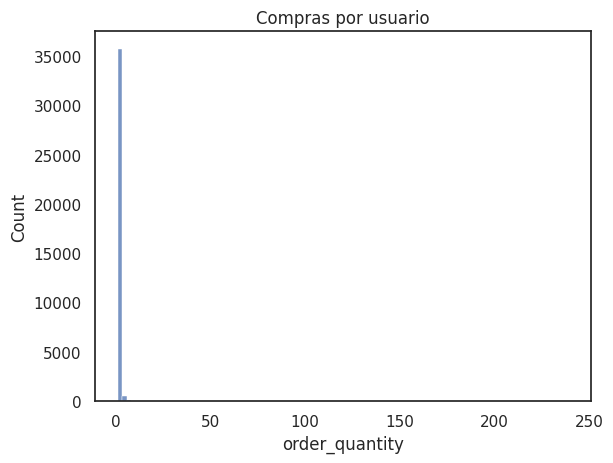

In [10]:
orders_per_customer = orders_.groupby('Uid').agg({'Buy Ts' : 'count'}).sort_values(by = 'Buy Ts', ascending = False)
orders_per_customer.columns = ['order_quantity']

orders_per_customer_top = orders_per_customer.head(20)

print(orders_per_customer)
print('El promedio de compras por usuario es de :', orders_per_customer['order_quantity'].mean())

# Se grafica un histograma para observar la cantidad de productos que compran los usuarios generalmente.
sns.histplot(orders_per_customer['order_quantity'], bins=100)
plt.title('Compras por usuario')

El promedio de compra por usuario es de 1 producto, tal como se puede observar en el histograma. Hay muy pocos casos en los que un usuario puede llegar a comprar más de 50 productos en la página.

### Cuánto dinero traen? (LVT) ###

In [11]:
orders_new['order_date'] = pd.to_datetime(orders_new['Buy Ts'])
orders_new['order_month'] = orders_new['order_date'].astype('datetime64[M]')


first_orders = orders_new.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']

cohort_sizes= first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

orders2 = pd.merge(orders_new,first_orders, on='Uid')

cohorts = orders2.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()


report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

margin_rate = 1

report['gp'] = report['Revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()

output.fillna('')
print(report)





   first_order_month  n_buyers order_month   Revenue        gp  age       ltv
0         2017-06-01      2023  2017-06-01   9557.49   9557.49    0  4.724414
1         2017-06-01      2023  2017-07-01    981.82    981.82    1  0.485329
2         2017-06-01      2023  2017-08-01    885.34    885.34    2  0.437637
3         2017-06-01      2023  2017-09-01   1931.30   1931.30    3  0.954671
4         2017-06-01      2023  2017-10-01   2068.58   2068.58    4  1.022531
..               ...       ...         ...       ...       ...  ...       ...
74        2018-03-01      3533  2018-05-01   1114.87   1114.87    2  0.315559
75        2018-04-01      2276  2018-04-01  10600.69  10600.69    0  4.657597
76        2018-04-01      2276  2018-05-01   1209.92   1209.92    1  0.531599
77        2018-05-01      2988  2018-05-01  13925.76  13925.76    0  4.660562
78        2018-06-01         1  2018-06-01      3.42      3.42    0  3.420000

[79 rows x 7 columns]


Observamos en la tabla que la mayoría de las ganancias se obtienen en el mismo mes que se registran los usuarios. Sin embargo, no hay muchas ganancias y no son muchos los usuarios que vuelven a comprar.

## Marketing ##
### Cuánto dinero se gastó? ###

        month  source_id    costs
0  2017-06-01          1  1125.61
1  2017-06-01          2  2427.38
2  2017-06-01          3  7731.65
3  2017-06-01          4  3514.80
4  2017-06-01          5  2616.12
..        ...        ...      ...
79 2018-05-01          3  9411.42
80 2018-05-01          4  4214.21
81 2018-05-01          5  3669.56
82 2018-05-01          9   362.17
83 2018-05-01         10   409.86

[84 rows x 3 columns]


<AxesSubplot:title={'center':'Gastos al mes por fuente'}, xlabel='source_id', ylabel='month'>

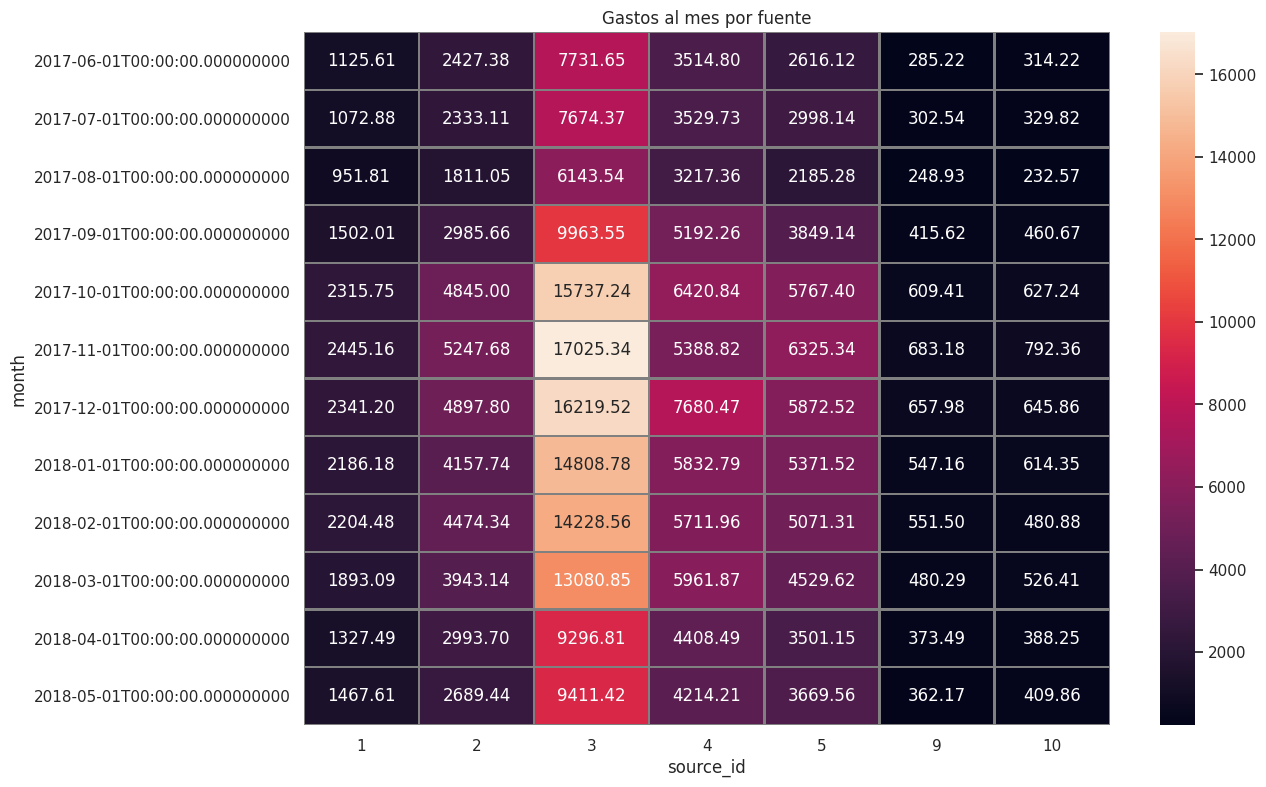

In [12]:
costs['month'] = costs['dt'].astype('datetime64[M]')

costs_per_month_source = costs.groupby(['month', 'source_id']).agg({'costs' : 'sum'}).reset_index()

print(costs_per_month_source)
costs_pivot = costs_per_month_source.pivot_table(index = 'month', columns = 'source_id', values = 'costs', aggfunc = 'mean')


sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Gastos al mes por fuente')
sns.heatmap(costs_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray'
)


En el mapa de calor aquí mostrado, nos indica que el mes de noviembre fue cuando más gastos se realizaron en marketing con la fuente con ID 3, aunado con el mes de diciembre. Esto concuerda con el número de visitas que se obtuvo anteriomente, que nos indicaba que en estas fechas es cuando más visitas tuvo la página.

### Cuál fue el costo de adquisición de clientes de cada una de las fuentes? ###

In [13]:
# Obtenemos los costos totales por fuente
source_costs = costs.groupby(['source_id']).agg({'costs' : 'sum'}).reset_index()
print(source_costs.head(15))

   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


     Device  Source Id    Uid
0   desktop          1  25901
1   desktop          2  35661
2   desktop          3  65777
3   desktop          4  67640
4   desktop          5  50069
5   desktop          6      5
6   desktop          7     28
7   desktop          9  10119
8   desktop         10   7367
9     touch          1   8220
10    touch          2  11965
11    touch          3  19833
12    touch          4  34154
13    touch          5  16836
14    touch          6      1
15    touch          7      8
16    touch          9   3158
17    touch         10   2658


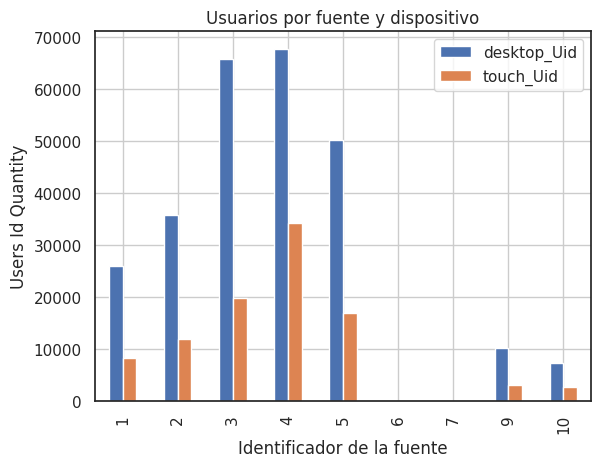

In [14]:
users_per_source_device = visits.groupby(['Device', 'Source Id']).agg({'Uid' : 'count'}).reset_index()


# Se usa un slice de datos para los dos dispositivos para poder graficar en un mismo gráfico para mejor comparativa
slice_for_desktop = users_per_source_device[users_per_source_device['Device'] == 'desktop']
slice_for_desktop = slice_for_desktop.rename(columns = {'Uid' : 'desktop_Uid'})

slice_for_touch = users_per_source_device[users_per_source_device['Device'] == 'touch']
slice_for_touch = slice_for_touch.rename(columns = {'Uid' : 'touch_Uid'})
merged_devices = pd.merge(slice_for_touch, slice_for_desktop, on = 'Source Id', how = 'outer')

print(users_per_source_device)

#print(new_merge)
merged_devices.plot(x =  'Source Id', y = ['desktop_Uid', 'touch_Uid'], kind = 'bar', title = 'Usuarios por fuente y dispositivo', xlabel = 'Identificador de la fuente',  ylabel = 'Users Id Quantity', grid = True)
plt.show()



Por medio de esta gráfica, observamos que la computadora de escritorio es la predilecta para ingresar a la página de Showz. A pesar de que tiene mucha afluencia de personas, es necesario realizar un estudio de cuánto se gastó en esa fuente, la número 4, para ver si es conveniente seguir inyectando gastos en la misma debido a la afluencia de visitantes. También observamos que las fuentes 6 y 7 tuvieron afluencia de visitantes, sin embargo en el archivo de costos, no hubo ningún gasto para estas fuentes, por lo que podrían considerarse "orgánicas".

   Source Id     Uid  source_id      costs  cost_per_user
0          1   34121          1   20833.27       0.610570
1          2   47626          2   42806.04       0.898796
2          3   85610          3  141321.63       1.650761
3          4  101794          4   61073.60       0.599972
4          5   66905          5   51757.10       0.773591
5          9   13277          9    5517.49       0.415568
6         10   10025         10    5822.49       0.580797


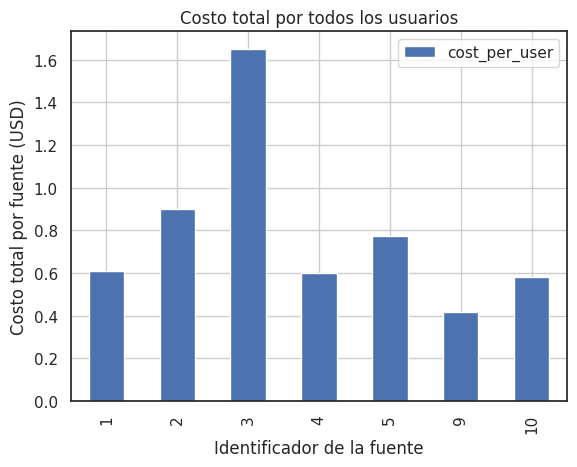

In [15]:
# Agrupamos las visitas por la fuente y obtenemos el total de los usuarios por fuente
users_per_source = visits.groupby(['Source Id']).agg({'Uid' : 'count'}).reset_index()

# fusionamos los usuarios por fuente y los costos toales por fuente para obtener el costo por usuario
merged_sources = pd.merge(users_per_source, source_costs, left_on='Source Id', right_on='source_id')
merged_sources['cost_per_user'] = merged_sources['costs'] / merged_sources['Uid']
print(merged_sources)
merged_sources.plot(x =  'Source Id', y = 'cost_per_user', kind = 'bar', title = 'Costo total por todos los usuarios', xlabel = 'Identificador de la fuente',  ylabel = 'Costo total por fuente (USD)', grid = True)
plt.show()

De acuerdo al gráfico de barras, la fuente con identificación 3 es la que más costo conlleva para atraer clientes a la página, por lo que se sugiere que se enfoquen esfuerzos en las fuentes con identificación número 9 y número 10 para generar mayor actividad en la página con menores costos. En la fuente número 9, se gastó casi 25 veces menos en comparación con la fuente 4.

### Cuán rentables eran las inversiones? (ROMI) ### 

In [16]:
#obtenemos los costos totales por mes
monthly_costs = costs.groupby('month').agg({'costs' : 'sum'})

#fusionamos el report anterior donde contenía el lvt para poder obtener el CAC
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']


# Obtenemos el ROMI
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output.cumsum(axis=1).round(2)


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Obtenemos el ROMI promedio de todos los cohortes
output.cumsum(axis=1).mean(axis=0)

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

De acuerdo a la tabla de inversiones ROMI, podemos observar que la fecha del mes de septiembre empezó a generar ganancias después de 4 meses, que concuerda con la fecha de diciembre. Snn embargo, observamos que este negocio no está dando buenos resultado ya que después de 8 meses en promedio es cuando empieza a haber ganancias o retorno de inversión del marketing. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizados los cálculos y las gráficas mostradas, queda muy claro el proceso de análisis seguido ya que cada gráfica y resultado mostrado tiene su respectiva interpretación lo cual es una muy buena práctica en análisis complejos cómo este
</div>

# CONCLUSIÓN #

De acuerdo a los métricos e investigaciones de toda la información proporcionada, se sugiere que se invierta los costos de marketing en las fuentes con identificación de los números 4 y 9, ya que son los que menores costos por afluencia conlleva en la página. De igual manera, vemos que la mayor afluencia se concentra en las personas que usan computadora de escritorio, lo que nos puede indicar que la interfaz de los dispositivos móviles aún no es muy intuitiva, por lo que se sugiere hacer una revisión en la experiencia del usuario de dispositivos móviles.

Es de notar también que las personas no son clientes recurrentes o de compra al poco tiempo después de ingresar. La mayoría solo hacen una compra en el día que se registran y no vuelven después de mucho tiempo, por lo que hay que revisar los eventos que se están promoviendo y también la simplicidad para adquirir los productos y servicios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Tienes un muy buen análisis de este proyecto Alejandro, te felicito!

Siempre este tipo de análisis que son un poco más complejos hay que buscar cómo explicarlos de manera sencilla considerando la audiencia a la cual se va a presentar los resultados y es ahí donde las visualizaciones juegan un papel muy importante ya que con una visualización es mucho más fácil entender la explicación que con solo valores numéricos.

Muy buen trabajo, saludos!
</div>